<a href="https://colab.research.google.com/github/P1nkP1sY/G.231.22.0006_Deannys-Anugerah-F/blob/main/Unsupervised_Learning_Hierarchical_cluster_G_231_22_0006.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

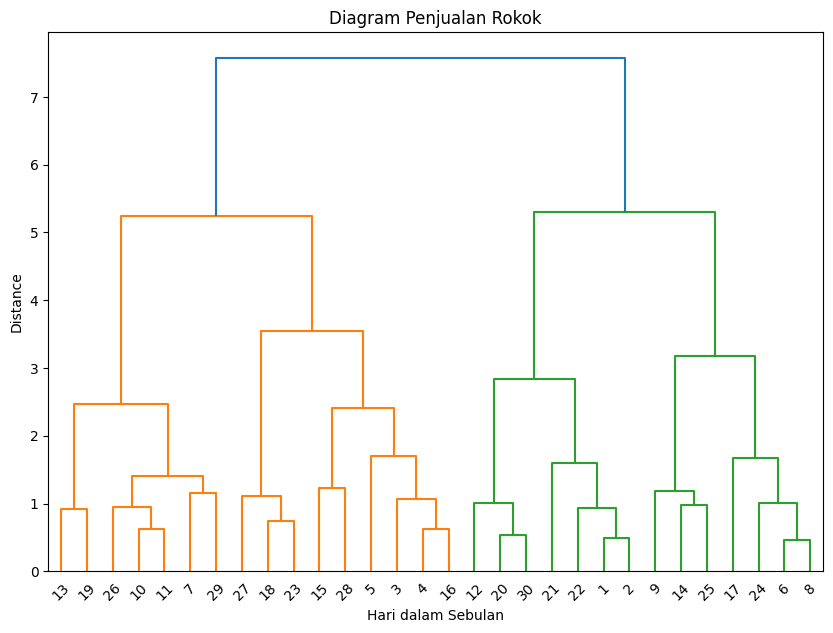

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.preprocessing import StandardScaler

# Generate synthetic sales data
np.random.seed(42)
days = np.arange(1, 31)  # Days in a month
sales = np.random.randint(50, 200, size=(30, 3))  # Random sales data for 3 types of cigarettes

# Create a DataFrame
data = pd.DataFrame(sales, columns=['Djarum', 'Malboro', 'Surya'])
data['Day'] = days

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[['Djarum', 'Malboro', 'Surya']])

# Perform hierarchical/agglomerative clustering
Z = linkage(scaled_data, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(Z, labels=data['Day'].values)
plt.title('Diagram Penjualan Rokok')
plt.xlabel('Hari dalam Sebulan')
plt.ylabel('Distance')
plt.show()

In [17]:
# Determine clusters
max_d = 5  # Adjust this threshold to form clusters
clusters = fcluster(Z, max_d, criterion='distance')

data['Cluster'] = clusters

print("Cluster assignments:\n", data.head(10))

Cluster assignments:
    Djarum  Malboro  Surya  Day  Cluster
0     152      142     64    1        3
1     156      121     70    2        3
2     152      171    124    3        2
3     137      166    149    4        2
4     153      180    199    5        2
5     102       51    137    6        4
6      87      179     70    7        1
7     107       71    138    8        4
8      98      108     64    9        4
9     100      157    104   10        1


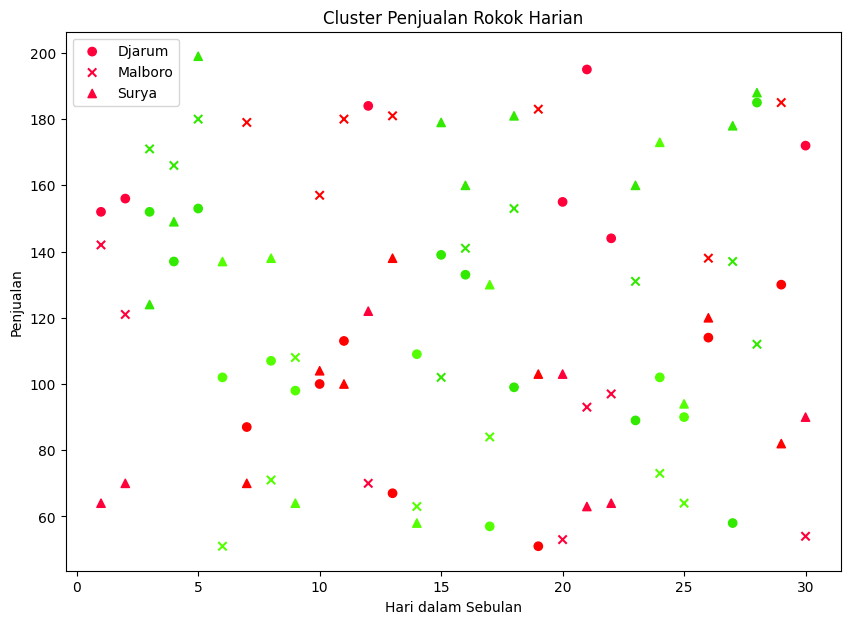

In [18]:
# Plot clusters
plt.figure(figsize=(10, 7))
plt.scatter(data['Day'], data['Djarum'], c=data['Cluster'], cmap='prism', label='Djarum')
plt.scatter(data['Day'], data['Malboro'], c=data['Cluster'], cmap='prism', marker='x', label='Malboro')
plt.scatter(data['Day'], data['Surya'], c=data['Cluster'], cmap='prism', marker='^', label='Surya')
plt.title('Cluster Penjualan Rokok Harian')
plt.xlabel('Hari dalam Sebulan')
plt.ylabel('Penjualan')
plt.legend()
plt.show()